In [4]:
from pandas import read_csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shapely.wkt
import geopandas as gpd
import contextily as cx

os.chdir('/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/BEAM-CORE/BEAM Validation')

plt.style.use('ggplot')
scenario_name = 'SF2018'

In [14]:
model_network = gpd.read_file('sample output/SFB2018/beam_network_by_county.geojson')
# model_network.head(5)
hpms_network = gpd.read_file('data for validation/SF/sf_hpms_inventory_clipped.geojson')
hpms_network.head(5)

,County_Cod,Route_ID,Begin_Poin,End_Point,Route_Numb,F_System,Urban_Code,Through_La,Speed_Limi,AADT,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,1.0,ALA_OAK_HEGENBERGER RD_P,0.266,0.300,0.0,3.0,78904.0,2.0,0.0,50612.0,...,G4020,488,41860,36084,A,1.914243e+09,212979931,+37.6471385,-121.9124880,"LINESTRING (-122.20159 37.72656, -122.20158 37..."
1,1.0,SHS_013_P,4.000,4.008,13.0,2.0,78904.0,4.0,0.0,64000.0,...,G4020,488,41860,36084,A,1.914243e+09,212979931,+37.6471385,-121.9124880,"LINESTRING (-122.21597 37.83177, -122.21605 37..."
2,1.0,ALA_UNC_ALMADEN BLVD_P,0.928,0.976,0.0,5.0,78904.0,2.0,0.0,4361.0,...,G4020,488,41860,36084,A,1.914243e+09,212979931,+37.6471385,-121.9124880,"LINESTRING (-122.05691 37.60152, -122.05687 37..."
3,1.0,ALA_OAK_FOOTHILL BLVD_P,1.485,1.530,0.0,4.0,78904.0,2.0,0.0,3730.0,...,G4020,488,41860,36084,A,1.914243e+09,212979931,+37.6471385,-121.9124880,"LINESTRING (-122.23547 37.78571, -122.23475 37..."
4,1.0,ALA_CO_VIA ALAMITOS_P,0.845,1.072,0.0,5.0,78904.0,2.0,0.0,26785.0,...,G4020,488,41860,36084,A,1.914243e+09,212979931,+37.6471385,-121.9124880,"LINESTRING (-122.13504 37.67662, -122.13542 37..."


In [10]:
# filter BEAM network
print(model_network.attributeOrigType.unique())
model_network_filtered = \
model_network.loc[~model_network['NAME'].isin(['Yolo', 'Santa Cruz'])]

road_type_to_exclude = ['unclassified', 'null']
model_network_filtered = \
model_network_filtered.loc[~model_network_filtered['attributeOrigType'].isin(road_type_to_exclude)]

['motorway' 'secondary' 'motorway_link' 'unclassified' 'primary'
 'secondary_link' 'tertiary' 'trunk' 'road' 'tertiary_link' 'primary_link'
 'trunk_link' 'null']


In [17]:
# filter HPMS network
print(hpms_network.NAME.unique())
hpms_network_filtered = \
 hpms_network.loc[~hpms_network['NAME'].isin(['Yolo', 'Santa Cruz'])]

['Alameda' 'Contra Costa' 'Marin' 'Napa' 'San Francisco' 'San Mateo'
 'Santa Clara' 'Santa Cruz' 'Solano' 'Sonoma' 'Yolo']


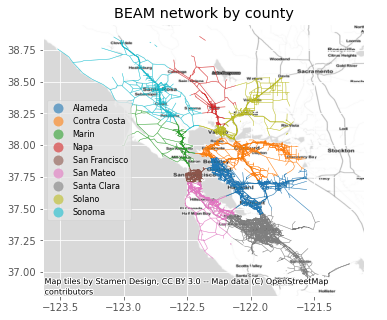

In [31]:
# plot BEAM network by county
fig, ax = plt.subplots(figsize=(6, 5))
model_network_filtered.plot(ax=ax, column = 'NAME', alpha = 0.6, 
                        linewidth = 0.5, legend=True, 
                            legend_kwds={'loc': 'center left', 'fontsize': '8'})
cx.add_basemap(ax, crs = 'EPSG:4326', source = cx.providers.Stamen.TonerLite)
plt.title('BEAM network by county')
plt.savefig('Plot/' + scenario_name + '/beam-network-by-county.png', dpi = 200)

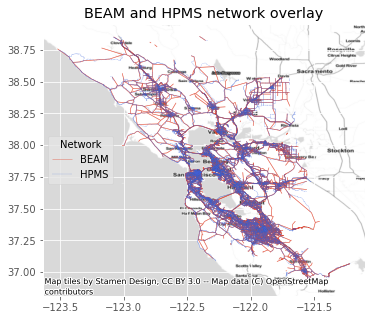

In [32]:
fig, ax = plt.subplots(figsize=(6, 5))
model_network_filtered.plot(ax=ax, alpha=0.6, linewidth = 0.6)
hpms_network_filtered.plot(ax=ax,linestyle = ':', color = 'royalblue',
                           linewidth = 0.4)
cx.add_basemap(ax, crs = 'EPSG:4326', 
               source = cx.providers.Stamen.TonerLite)
plt.legend(loc = 'center left', labels = ['BEAM', 'HPMS'], 
           title = 'Network')
plt.title('BEAM and HPMS network overlay')
plt.savefig('Plot/' + scenario_name + '/beam-hpms-networks.png', dpi = 200)